### Setup

In [20]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Seaborn base theme
sns.set_theme(
    context="paper",  # 'paper' = smaller, for journal figures
    style="whitegrid",  # clean background with subtle grid
    font="DejaVu Sans",  # use a consistent sans-serif (replace if needed)
    font_scale=1.4,  # scale up text a bit for readability
    palette="Set2",
    rc={
        # Figure sizing
        "figure.figsize": (10, 8),  # in inches; adjust for single-column
        "axes.titlesize": 14,
        "axes.labelsize": 12,
        "axes.linewidth": 1.0,
        "axes.labelpad": 8,
        "axes.grid": True,
        "grid.linewidth": 0.4,
        "grid.alpha": 0.6,
        "lines.linewidth": 1.5,
        "lines.markersize": 5,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "legend.fontsize": 10,
        "legend.frameon": False,
        "savefig.dpi": 300,
        "savefig.transparent": True,  # transparent background for vector exports
        "pdf.fonttype": 42,  # embed TrueType fonts (important for Illustrator)
        "ps.fonttype": 42,
    },
)

# Matplotlib tight layout by default
plt.rcParams.update({"figure.autolayout": True})

In [36]:
ANALYSIS_FILE = "/home/amoneim/inflamm-debate-fm/notebooks/gsea/post_analysis_results.pkl"
results = pickle.load(open(ANALYSIS_FILE, "rb"))

### Cleanup

In [38]:
# clean up normalized coefficients keys
from collections import defaultdict


def clean_normalized_coefficients(messy_data):
    # 1. Create a defaultdict that automatically creates a nested dict
    consolidated_data = defaultdict(dict)

    # 2. Loop through each item in your messy dictionary
    for original_key, inner_dict in messy_data.items():
        # 3. Get the actual coefficient data (the value from the inner dict)
        # We assume the inner dict has only one value.
        if not inner_dict:
            continue  # Skip if the inner dict is empty
        coeff_data = list(inner_dict.values())[0]

        # 4. Parse the original key string
        # Remove the '_coeffs' suffix
        # e.g., 'Chronic_Inflammation_vs._Control_MouseToHuman_coeffs'
        #   -> 'Chronic_Inflammation_vs._Control_MouseToHuman'
        base_key = original_key.removesuffix("_coeffs")

        # 5. Split the string from the *right* side to separate the setup and direction
        try:
            # rsplit('_', 1) splits at the *last* underscore
            # 'Chronic_Inflammation_vs._Control_MouseToHuman'
            #   -> ['Chronic_Inflammation_vs._Control', 'MouseToHuman']
            setup_name, species_direction = base_key.rsplit("_", 1)

            # 6. Assign the data to the new nested structure
            # defaultdict ensures consolidated_data[setup_name] exists as a dict
            consolidated_data[setup_name][species_direction] = coeff_data

        except ValueError:
            # This will catch any keys that don't match the expected format
            print(f"Warning: Skipping key with unexpected format: {original_key}")

    # 7. Convert back to a regular dict (optional, but cleaner for printing)
    consolidated_data = dict(consolidated_data)

    return consolidated_data


results["normalized_coeffs"] = clean_normalized_coefficients(results["normalized_coeffs"])

In [39]:
# clean gsea summary
results["gsea_summary"] = clean_normalized_coefficients(results["gsea_summary"])

In [46]:
results["gsea_summary"]["Chronic_Inflammation_vs_Control"]["MouseToHuman"]

,index,Name,Term,ES,NES,NOM p-val,FDR,FWER p-val,Tag %,Gene %,Genes
0,0,prerank,Antimicrobial Peptides,0.735357,2.176343,0.0,0.007552,0.005,8/22,2.48%,LTF;LCN2;CAMP;S100A8;S100A9;CTSG;PGLYRP1;CCR2
1,1,prerank,Telomere Extension By Telomerase,0.756345,2.061323,0.0,0.022655,0.029,8/15,15.84%,WRAP53;ANKRD28;CCNA2;CDK2;TERF2IP;CCNA1;TERF2;...
2,2,prerank,Extension of Telomeres,0.599854,2.001817,0.0,0.03632,0.071,15/33,16.86%,WRAP53;DNA2;ANKRD28;CCNA2;CDK2;TERF2IP;CHTF18;...
3,3,prerank,Neutrophil Degranulation,0.429914,1.995509,0.0,0.031285,0.077,101/286,19.45%,ATP11A;GYG1;LTF;LCN2;MVP;MPO;PLAC8;CAMP;S100A8...
4,4,prerank,Synthesis of DNA,0.51458,1.992987,0.0,0.025891,0.078,35/73,19.76%,DNA2;POLE;SEM1;POLE3;CCNA2;SKP2;CDK2;CCNE1;GIN...
...,...,...,...,...,...,...,...,...,...,...,...
1066,1066,prerank,Intrinsic Pathway of Fibrin Clot Formation,0.178929,0.525444,0.99,0.99591,1.0,9/21,29.21%,A2M;F10;GP1BA;F11;C1QBP;GP9;VWF;PRCP;SERPINA5
1067,1067,prerank,Common Pathway of Fibrin Clot Formation,0.180227,0.507468,0.990177,0.99645,1.0,3/17,16.69%,F10;F2R;F13A1
1068,1068,prerank,Downstream Signaling of Activated FGFR4,-0.153466,-0.470502,0.991632,0.999988,1.0,6/22,27.28%,FGF23;NRAS;FGF1;FGF18;SOS1;FGF16
1069,1069,prerank,PI-3K Cascade FGFR4,-0.149,-0.428374,0.995789,0.999255,1.0,11/18,42.82%,FGF23;FGF1;FGF18;FGF16;PTPN11;FGF20;FGF17;PIK3...


### Visualize genes

/tmp/ipykernel_1940750/1389026930.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=0)
/tmp/ipykernel_1940750/1389026930.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=0)


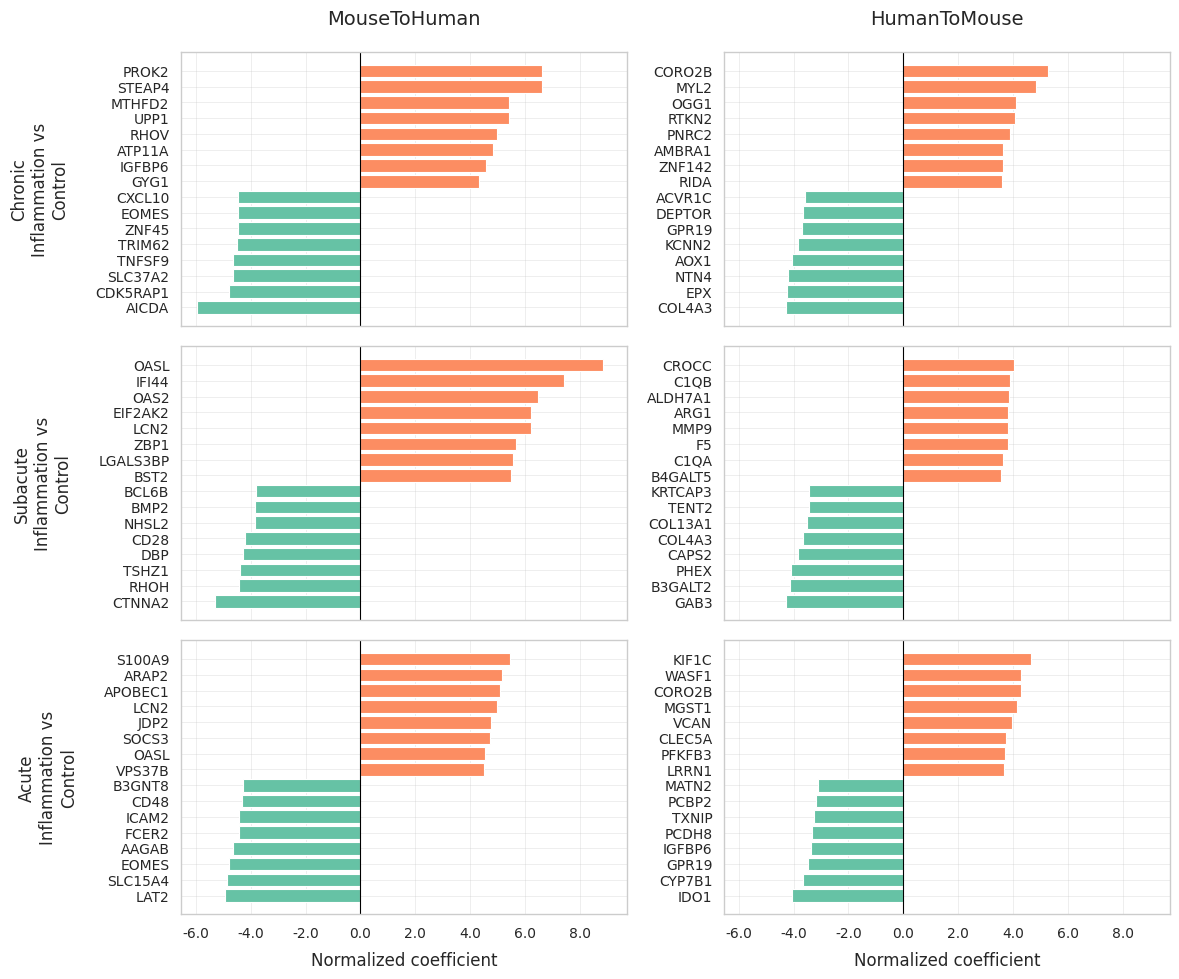

/tmp/ipykernel_1940750/1389026930.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=0)
/tmp/ipykernel_1940750/1389026930.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=0)


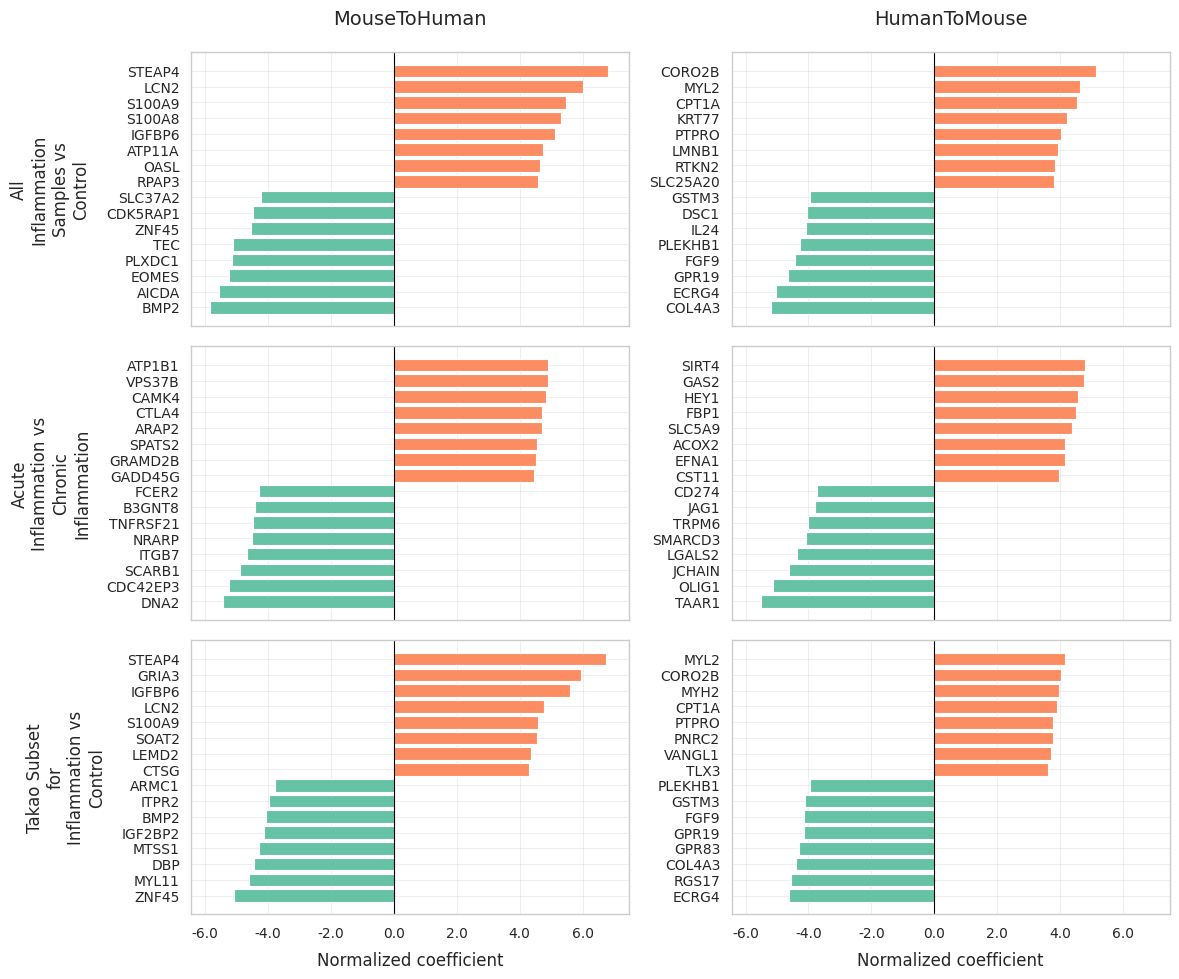

In [65]:
import textwrap

import matplotlib.pyplot as plt
import seaborn as sns


def plot_top_genes_grid_labeled(coef_dict, top_k=15, figsize=(12, 10)):
    """
    coef_dict: dict[setup][direction] -> pandas.DataFrame with 'gene' and 'coef_norm'
    top_k: number of top positive and negative genes to show per subplot
    """
    setups = list(coef_dict.keys())
    directions = ["MouseToHuman", "HumanToMouse"]

    palette = sns.color_palette("Set2", 2)
    neg_color = palette[0]
    pos_color = palette[1]

    fig, axs = plt.subplots(len(setups), len(directions), figsize=figsize, sharex=True)
    if axs.ndim == 1:
        axs = axs[np.newaxis, :]  # ensure 2D

    # global x-axis limits
    all_coefs = []
    for setup in setups:
        for direction in directions:
            df = coef_dict[setup][direction]
            all_coefs.append(df["coef_norm"])
    all_coefs = pd.concat(all_coefs)
    xlim = (all_coefs.min() * 1.1, all_coefs.max() * 1.1)  # 10% padding

    for i, setup in enumerate(setups):
        for j, direction in enumerate(directions):
            df = coef_dict[setup][direction].copy()
            ax = axs[i, j]

            # sort by coef_norm
            df_sorted = df.sort_values("coef_norm", ascending=True)
            top_neg = df_sorted.head(top_k)
            top_pos = df_sorted.tail(top_k)
            top_genes = pd.concat([top_neg, top_pos])

            # horizontal bar plot
            colors = [neg_color if x < 0 else pos_color for x in top_genes["coef_norm"]]
            ax.barh(top_genes.index, top_genes["coef_norm"], color=colors)
            ax.axvline(0, color="black", linewidth=0.8)
            ax.set_xlim(xlim)

            # only show x-label and ticks on bottom row
            if i == len(setups) - 1:
                ax.set_xlabel("Normalized coefficient")
                ax.tick_params(axis="x", rotation=0)
                ax.set_xticklabels(ax.get_xticks(), rotation=0)
            else:
                ax.set_xlabel("")
                ax.set_xticklabels([])

            ax.set_ylabel("")

    # Add column titles for directions
    for j, direction in enumerate(directions):
        axs[0, j].set_title(direction, fontsize=14, pad=20)

    # Add row labels for setups
    for i, setup in enumerate(setups):
        wrapped_label = "\n".join(
            textwrap.wrap(setup.replace("_", " "), width=15)
        )  # adjust width as needed
        axs[i, 0].set_ylabel(wrapped_label, fontsize=12, rotation=90, labelpad=40, va="center")

    plt.tight_layout()
    plt.show()


# subset results['normalize_coeffs] to the first 3 keys for easier visualization
subset_keys_1 = list(results["normalized_coeffs"].keys())[:3]
subset_keys_2 = list(results["normalized_coeffs"].keys())[3:]

results_1 = {k: results["normalized_coeffs"][k] for k in subset_keys_1}
results_2 = {k: results["normalized_coeffs"][k] for k in subset_keys_2}

plot_top_genes_grid_labeled(results_1, top_k=8)
plot_top_genes_grid_labeled(results_2, top_k=8)

/tmp/ipykernel_1940750/3755282875.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=0)
/tmp/ipykernel_1940750/3755282875.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=0)


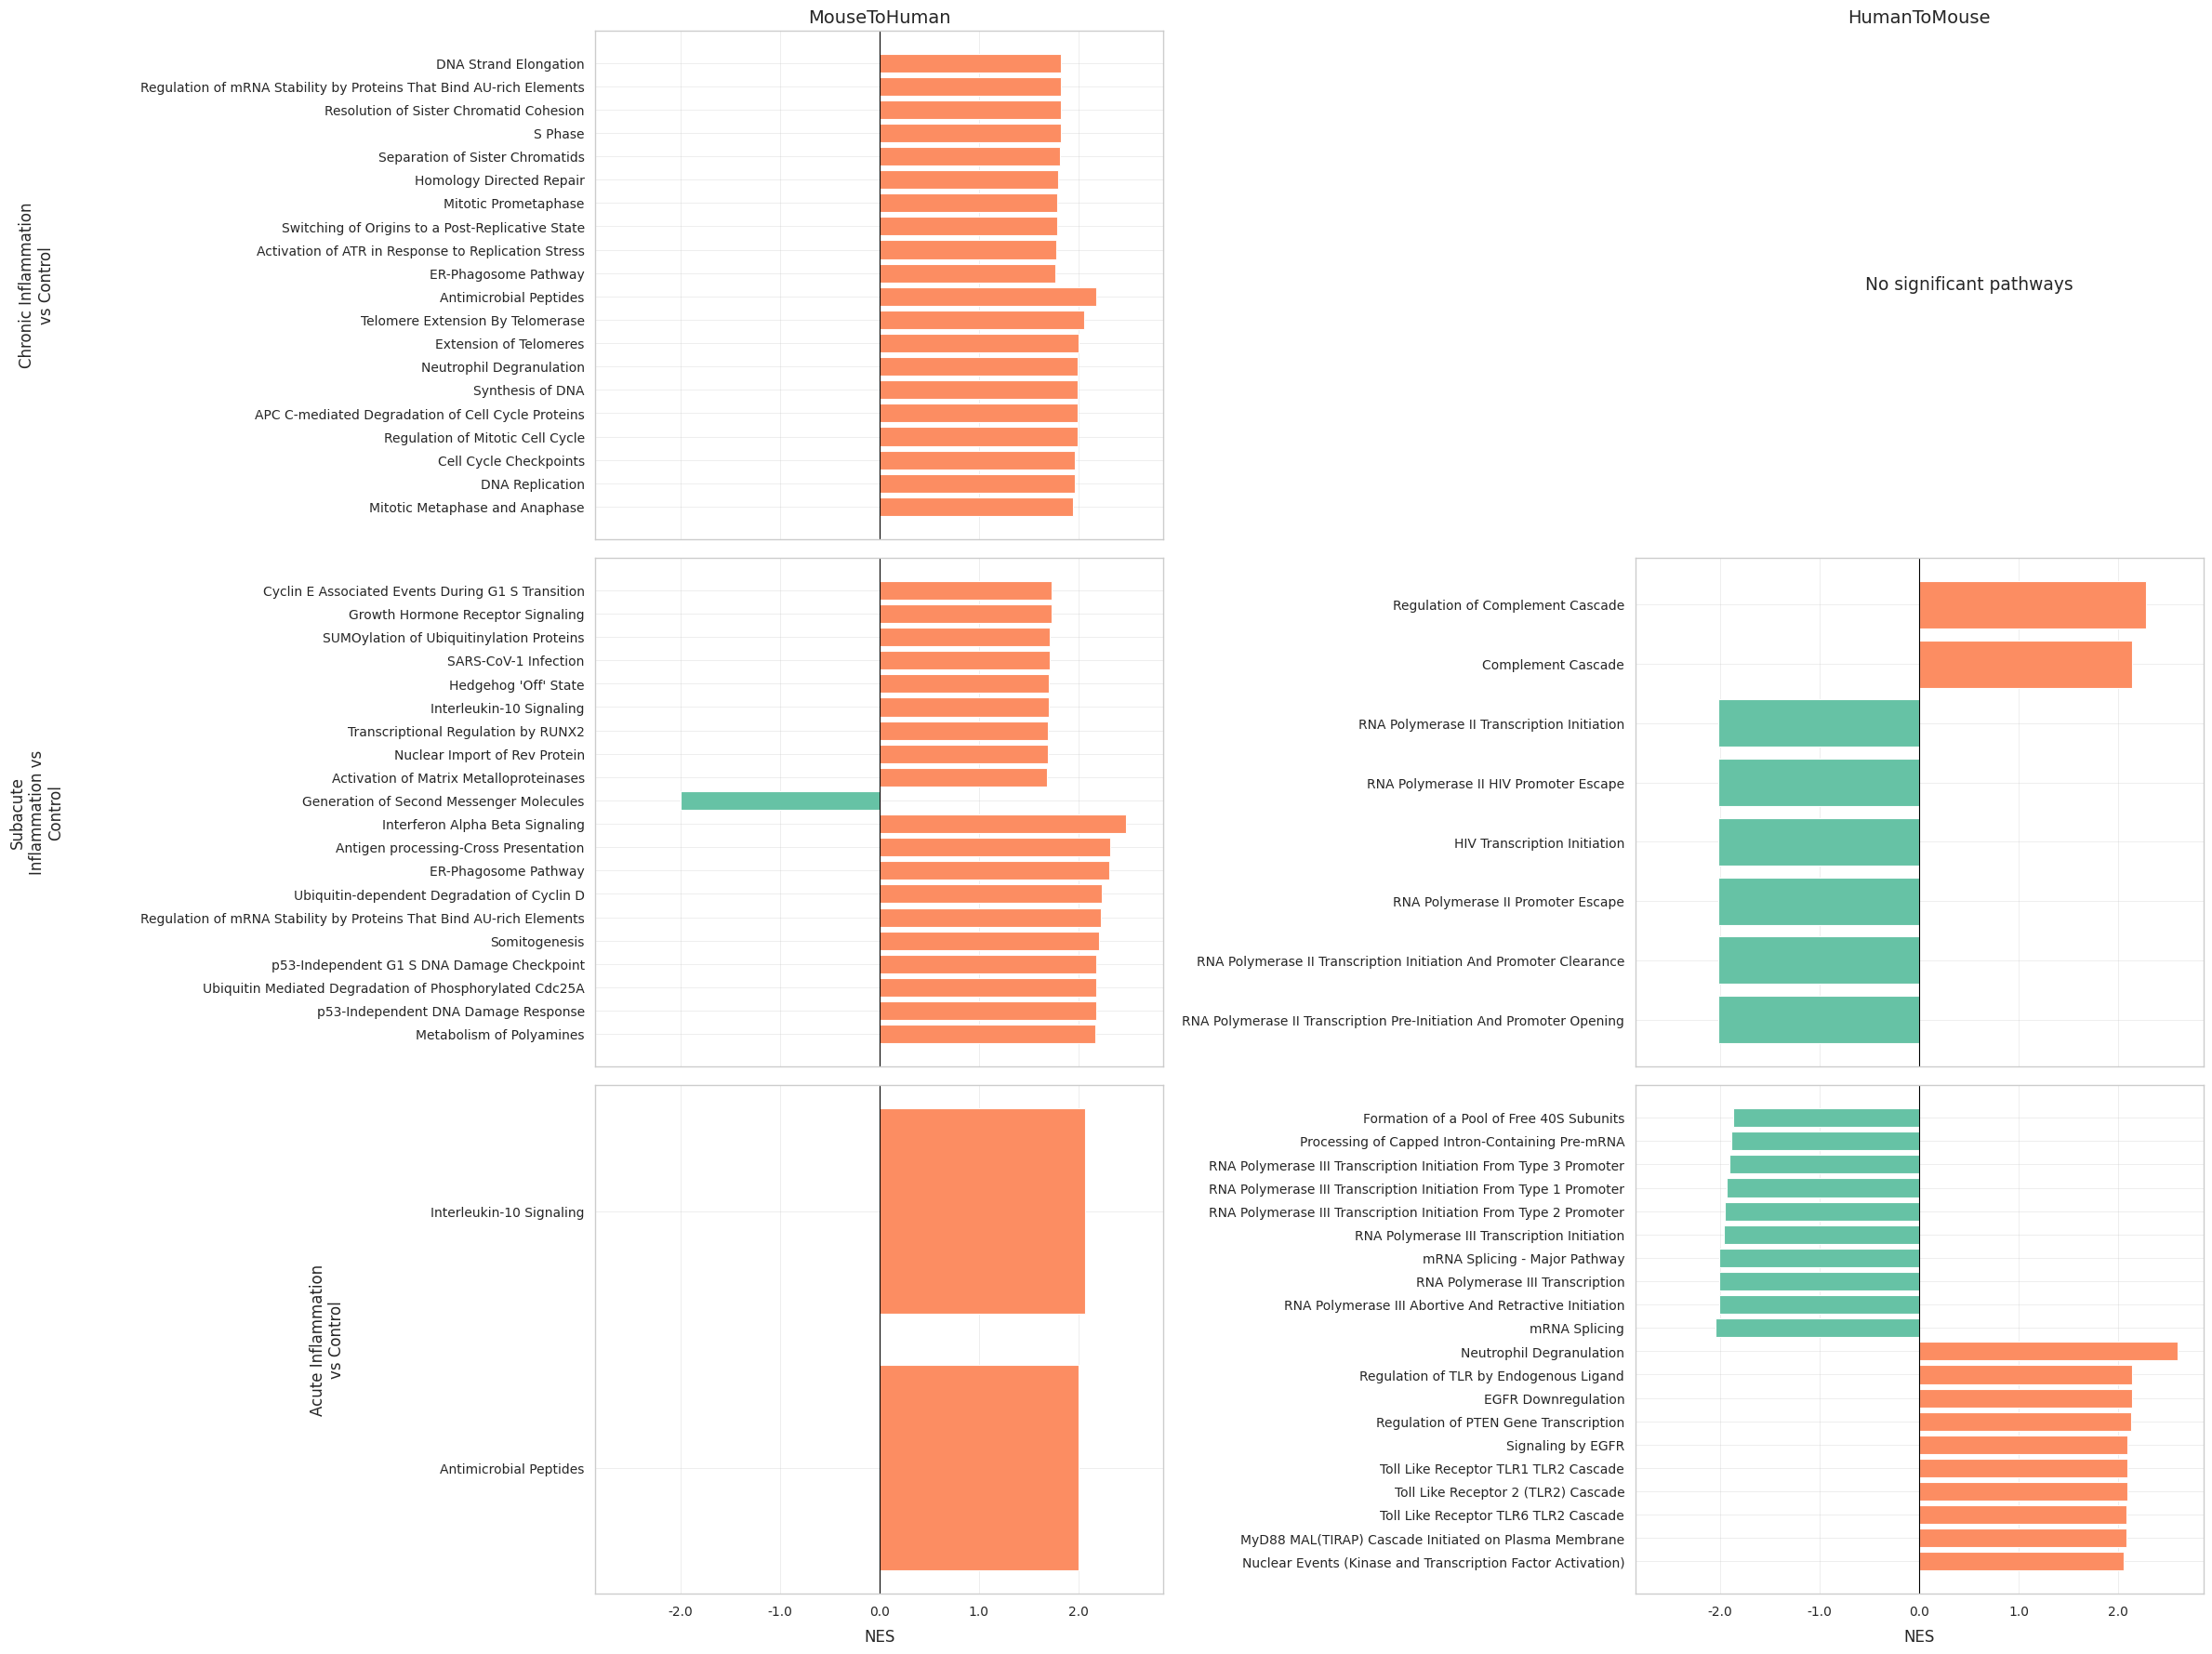

/tmp/ipykernel_1940750/3755282875.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=0)
/tmp/ipykernel_1940750/3755282875.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=0)


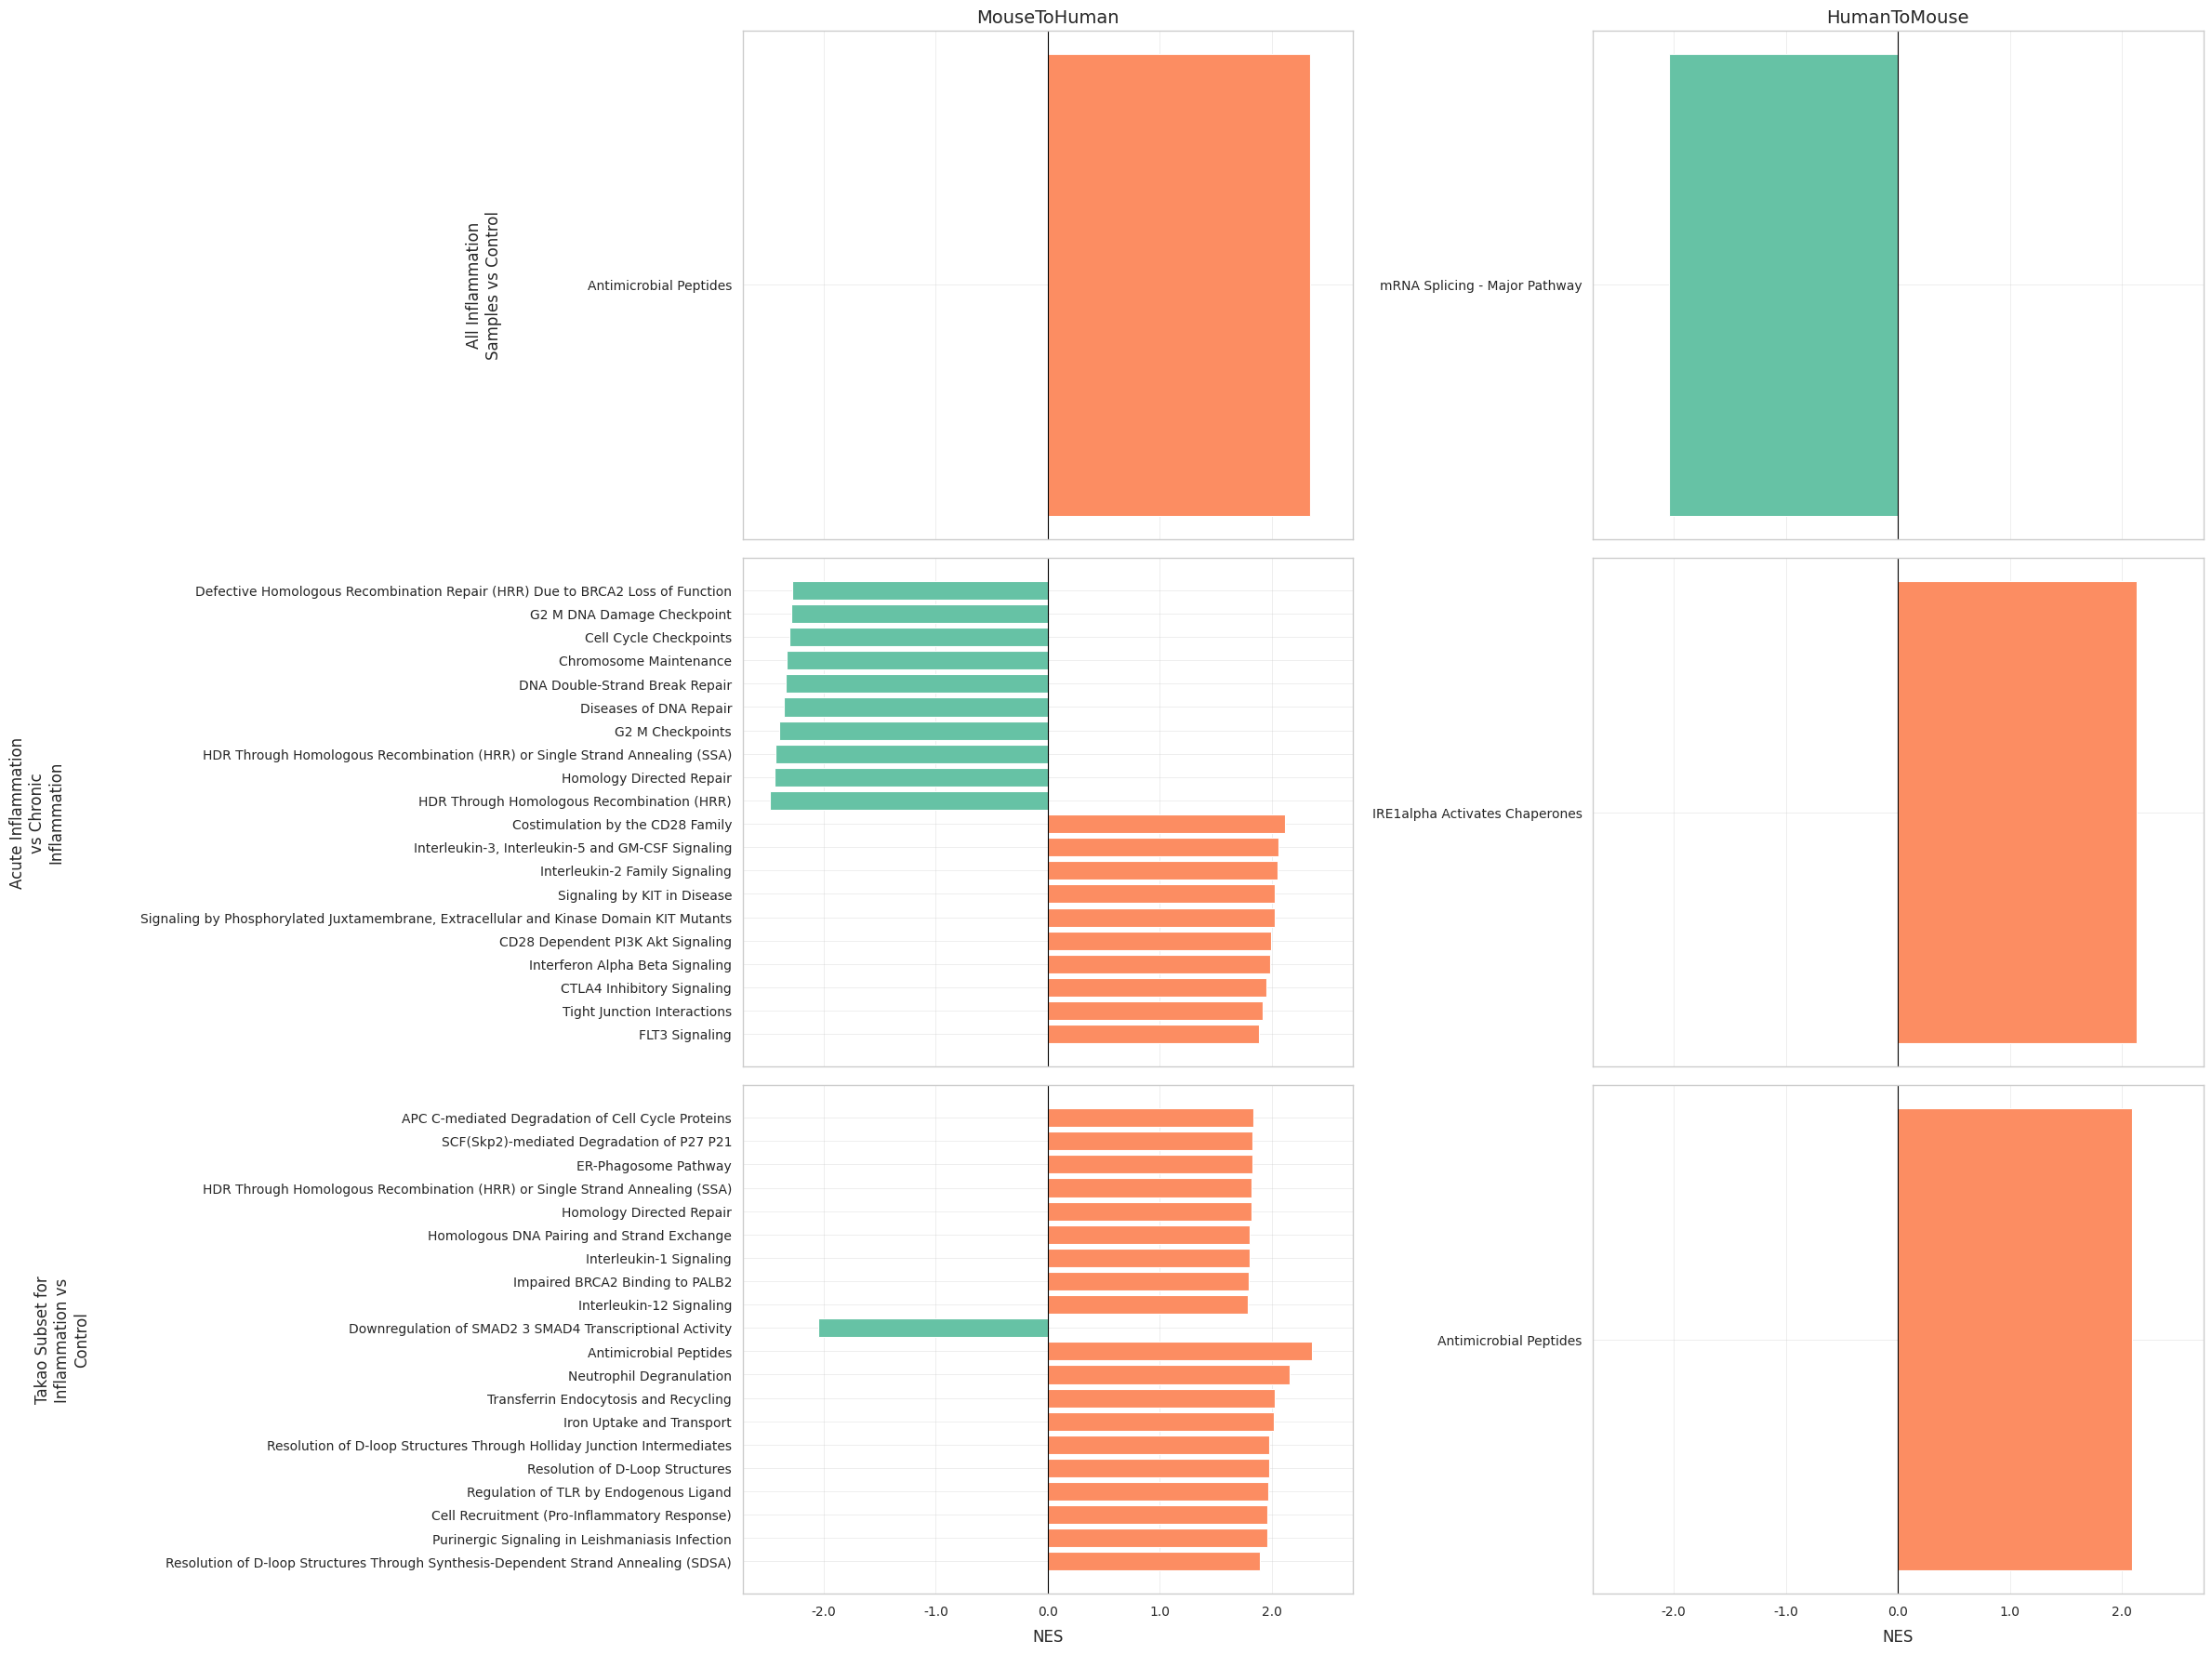

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_gsea_grid_labeled(gsea_dict, fdr_thresh=0.05, figsize=(24, 18), top_k=None):
    setups = list(gsea_dict.keys())
    directions = ["MouseToHuman", "HumanToMouse"]

    palette = sns.color_palette("Set2", 2)

    fig, axs = plt.subplots(len(setups), len(directions), figsize=figsize, sharex=True)
    if axs.ndim == 1:
        axs = axs[np.newaxis, :]  # ensure 2D

    # Column titles
    for j, direction in enumerate(directions):
        axs[0, j].set_title(direction, fontsize=14)

    # Determine global x-axis limits if top_k is None
    max_abs_nes = max(
        abs(df["NES"]).max()
        for setup in setups
        for df in gsea_dict[setup].values()
        if not df.empty
    )
    x_lim = (-max_abs_nes * 1.1, max_abs_nes * 1.1)

    for i, setup in enumerate(setups):
        # wrap setup label
        wrapped_label = "\n".join(textwrap.wrap(setup.replace("_", " "), width=20))
        for j, direction in enumerate(directions):
            df = gsea_dict[setup][direction].copy()
            df_sig = df[df["FDR"] < fdr_thresh].sort_values("NES", ascending=True)
            if top_k is not None:
                df_sig = pd.concat([df_sig.tail(top_k), df_sig.head(top_k)])

            ax = axs[i, j]
            if df_sig.empty:
                ax.text(0.5, 0.5, "No significant pathways", ha="center", va="center")
                ax.set_axis_off()
                continue

            # Bar colors based on sign
            colors = [palette[1] if x > 0 else palette[0] for x in df_sig["NES"]]
            ax.barh(df_sig["Term"], df_sig["NES"], color=colors)

            # Annotate FDR

            ax.axvline(0, color="black", linewidth=0.8)

            # Only show x-labels on bottom row
            if i == len(setups) - 1:
                ax.set_xlabel("NES")
                ax.tick_params(axis="x", rotation=0)
                ax.set_xticklabels(ax.get_xticks(), rotation=0)

            else:
                ax.set_xlabel("")
                ax.set_xticklabels([])

            # Only show y-labels on left column
            if j == 0:
                ax.set_ylabel(wrapped_label, fontsize=12, rotation=90, labelpad=80, va="center")
            else:
                ax.set_ylabel("")

            ax.set_xlim(x_lim)

    plt.tight_layout()
    plt.show()


# subset results['gsea_summary] to the first 3 keys for easier visualization
subset_keys_1 = list(results["gsea_summary"].keys())[:3]
subset_keys_2 = list(results["gsea_summary"].keys())[3:]

results_1 = {k: results["gsea_summary"][k] for k in subset_keys_1}
results_2 = {k: results["gsea_summary"][k] for k in subset_keys_2}

plot_gsea_grid_labeled(results_1, fdr_thresh=0.05, top_k=10)
plot_gsea_grid_labeled(results_2, fdr_thresh=0.05, top_k=10)